# Projet Campagnes Marketing bancaires

## Rapport d’exploration / de visualisation et de pré-traitement des données 

## 1. Introduction au projet 

### 1.1 Contexte

Analyser les données d’une campagne marketing bancaire afin d’identifier des leviers d’amélioration
et comprendre les facteurs associés à la souscription (variable cible) 
#### Contexte professionnel

**Point de vue technique :**  
Le projet demande des compétences technique d'analyse de données, nettoyage, pré-traitement 
et visualisation à l’aide de Python et des bibliothèques Pandas, Matplotlib et Seaborn.

**Point de vue économique :**  
Dans un contexte de forte concurrence bancaire, l’optimisation des campagnes marketing permet 
de mieux cibler les clients, de réduire les coûts de prospection et d’améliorer le taux de souscription.
 

### 1.2 Objectifs du projet

L’objectif de ce projet est d’analyser et préparer un nouveau jeu de données basé sur les anciennes campagnes marketing bancaires 
afin d’identifier des pistes d’amélioration pour les futures actions commerciales.

Afin de mieux répondre à l'objectifs du projet nous devons:
- Comprendre la structure et le contenu du jeu de données
- Identifier les variables pertinentes pour l’analyse des campagnes marketing
- Nettoyer et préparer les données afin de les rendre exploitables
- Mettre en évidence des relations entre variables à l’aide de visualisations
- Poser les bases d’analyses futures visant à améliorer l’efficacité des campagnes


## 2. Cadre et descriptif    

Le jeu de données que nous utilisons provient d'une campagnes marketing téléphonique menées par une banque 
Le fichier 'bank.csv' (Campagne marketing d'une banque) est disponible dans Kaggle


### 2.1 Cible

La cible du projet est la variable `deposit`, indiquant si le client a souscrit ou non à un dépôt à terme.

In [84]:
# Import du fichier CSV 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lecture du fichier csv 
df=pd.read_csv('bank.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 2.2 Volumétrie

Le Jeu de données contient **11 162 lignes** et **17 colonnes**
Le jeu de données contient deux variables :
- Variables quantitatifs (âge, solde bancaire, durée du contact…)
- Variables qualitatifs (profession, niveau d’éducation, type de contact…)
 

In [85]:
# la volumétrie du ficier csv lignes et colonnes 

print("Shape (lignes, colonnes) :", df.shape)


Shape (lignes, colonnes) : (11162, 17)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [87]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

### 2.3 Descriptif par variable

| Variable            | Description |
|---------------------|-------------|
|**`age`**            | l'age du client |
|**`job`**            | Catégorie d'emploi du client |
|**`marital`**        | Marié célibataire  autre |
|**`eduction`**       | niveau d'étude |
|**`default `**       | Risque d'impayé |
|**`balance`**        | le solde moyen annuel sur compte courant |
|**`housing`**        | Client avec ou sans prêt bancaire |
|**`loan`**           | Crédit à la consommation en cours |
|**`contact`**        | Moyen de contact tel portable/fixe/mail |
|**`day`**            | le jour de prise de contact |
|**`month`**          |le mois de prise de contact |
|**`duration`**       | durée de l'appel |
|**`campaign`**       | Combien de fois le client a été contacté durant la campagne|
|**`pdays`**          | le nombre de jours écoulé depuis le dernier appel |
|**`previous`**       | Combien de fois le client a été contacté avant cette campagne |
|**`poutcome`**       | Comment s'est finalisée la dernière campagne avec le client |
|**`deposit`**        | la réponse du client|


### 1.1 Traitement des duplicate

In [88]:
# On repère les lignes en doublons
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

In [89]:
print( 'Le nombre de lignes en doublons est égale à', df.duplicated().sum())

Le nombre de lignes en doublons est égale à 0


### 1.2 Traitement des NA

In [90]:
# On repère les lignes contenant des #NA 
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## 2. Etude variable quantitative

#### 2.1 Indicateurs des variables Numérique 

In [91]:
# les valeurs des indicateurs pour chaque colonne numérique
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


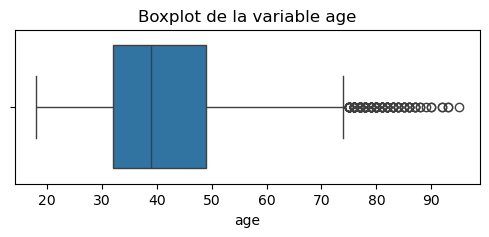

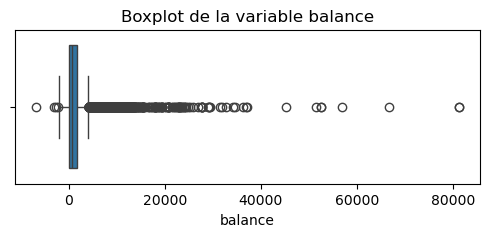

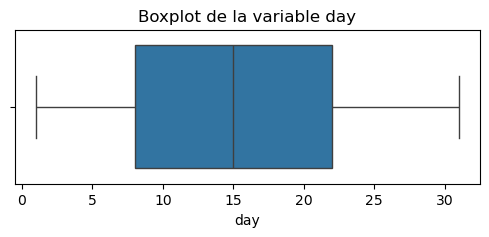

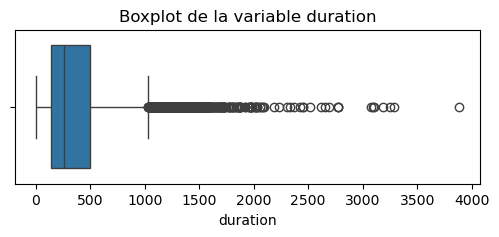

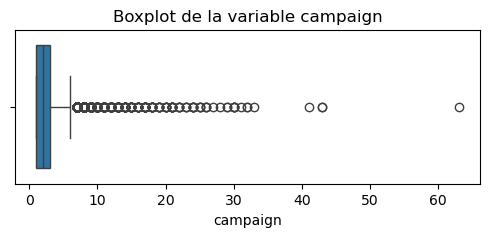

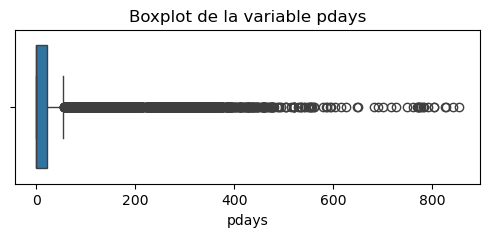

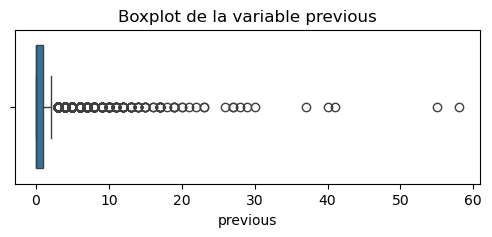

In [92]:
# Import de la librairie seaborn sous l'alias sns
num_data = df.select_dtypes(include="int64")

for col in num_data.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de la variable {col}")
    plt.show()


#### 
Les valeurs extrêmes observées correspondent à des profils clients atypiques mais réalistes.
Elles ont donc été conservées pour l’analyse exploratoire.

age


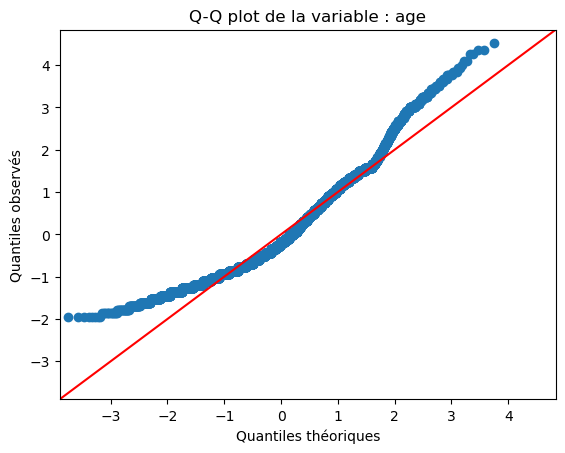

balance


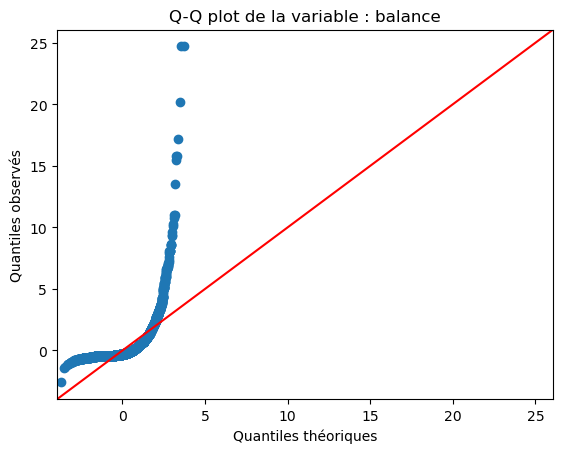

day


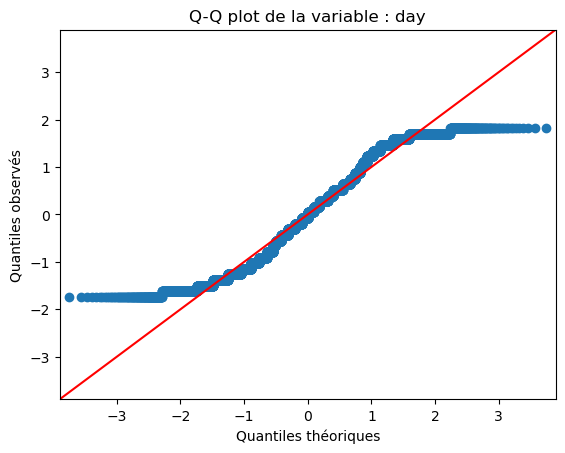

duration


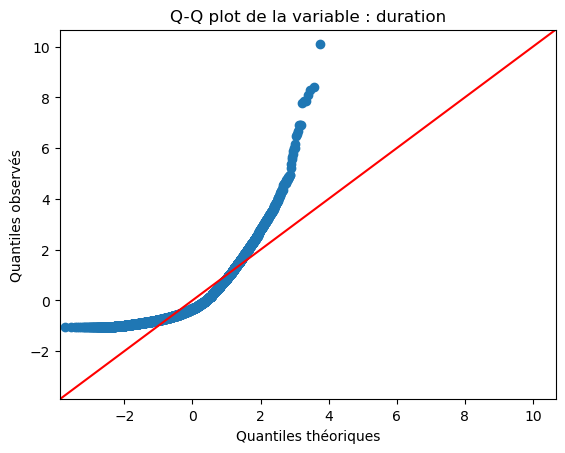

campaign


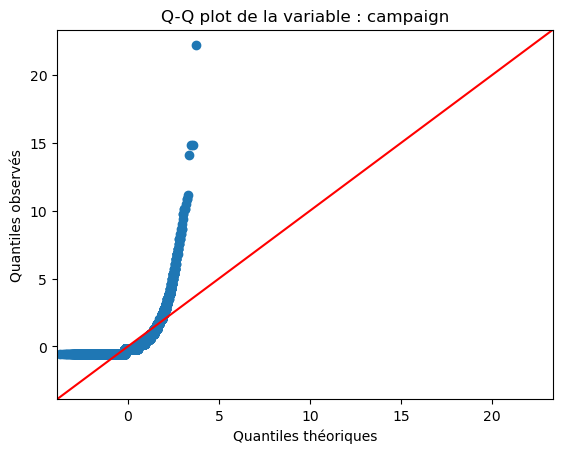

pdays


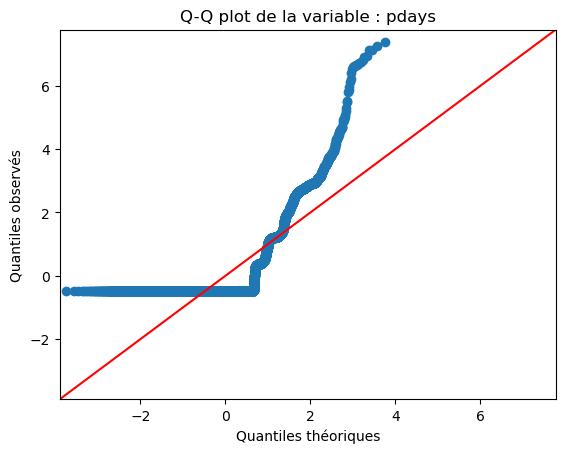

previous


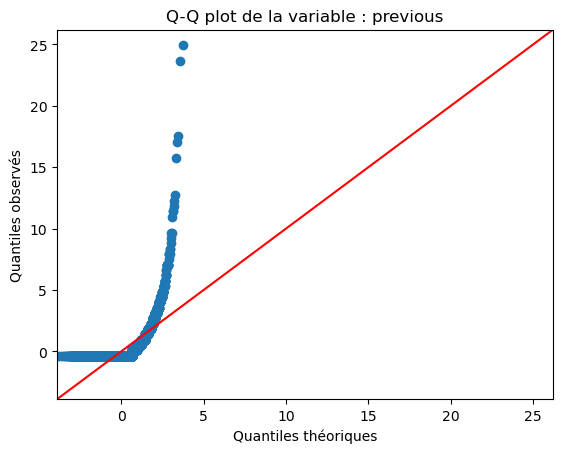

In [93]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

var_num = df.select_dtypes(include=['int', 'float'])

for column in var_num.columns:
    print(column)
    
    fig = sm.qqplot(var_num[column], line='45', fit=True)
    plt.title(f"Q-Q plot de la variable : {column}")
    plt.xlabel("Quantiles théoriques")
    plt.ylabel("Quantiles observés")
    
    plt.show()


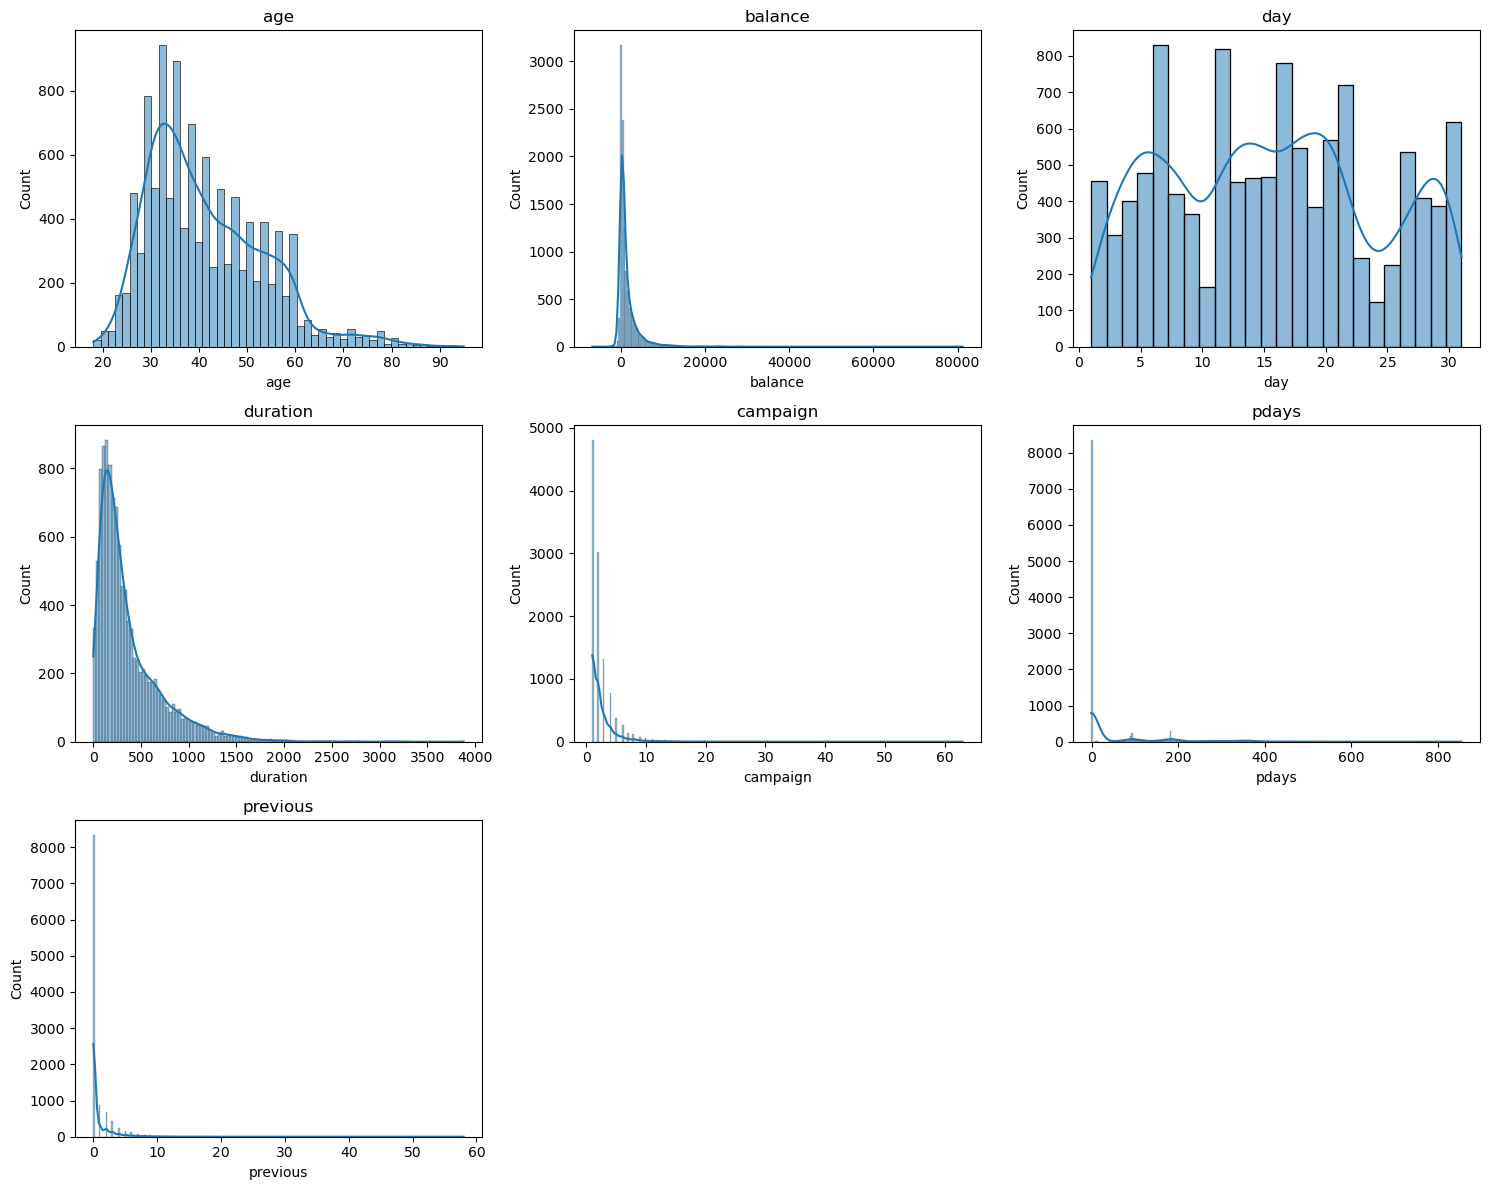

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

var_num = df.select_dtypes(include='int')
cols = 3
rows = math.ceil(len(var_num.columns) / cols)

plt.figure(figsize=(15, 4 * rows))

for i, column in enumerate(var_num.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(var_num[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


#### 2.3 Coréelation de variable numérique

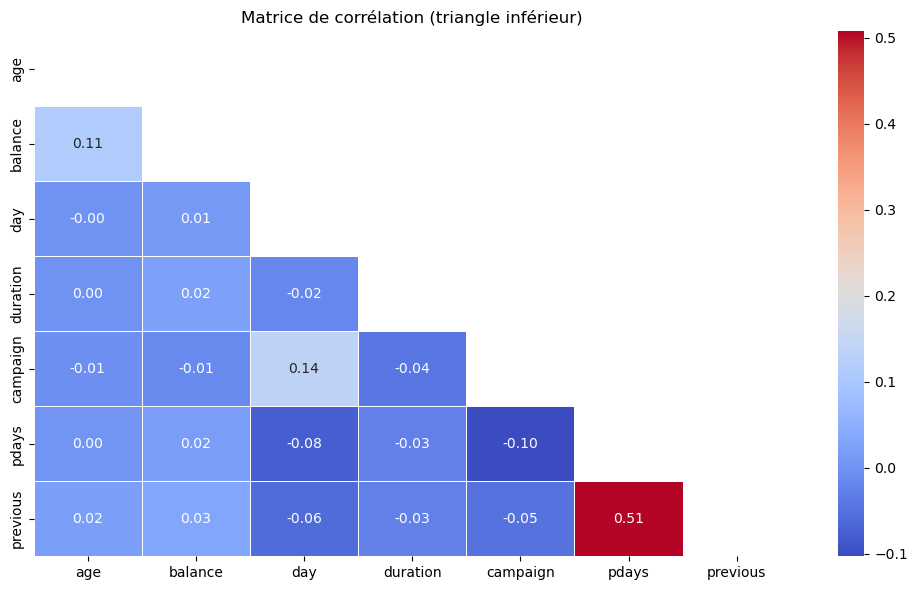

In [94]:
df_num = df.select_dtypes(include = 'int')
corr= df_num.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))  # masque le triangle supérieur

plt.figure(figsize=(10, 6))
sns.heatmap(corr,mask=mask,annot=True,fmt=".2f",cmap="coolwarm", linewidths=0.5)

plt.title("Matrice de corrélation (triangle inférieur)")
plt.tight_layout()
plt.show()

## 3. Etude variable qualitative

In [106]:
df.select_dtypes(include='object').head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


### 3.1 Identification et comptage des Modalités 

In [107]:
for col in cat_data.columns:
    print(f"Valeurs de la variable : {col}")
    print(f"{col} : {cat_data[col].nunique()} modalités")
    print(f"{col} mode : {cat_data[col].mode()}")
    print(cat_data[col].value_counts())
    print("-" * 30)

Valeurs de la variable : job
job : 12 modalités
job mode : 0    management
Name: job, dtype: object
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
------------------------------
Valeurs de la variable : marital
marital : 3 modalités
marital mode : 0    married
Name: marital, dtype: object
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
------------------------------
Valeurs de la variable : education
education : 4 modalités
education mode : 0    secondary
Name: education, dtype: object
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
------------------------------
Valeurs de la variable : default
default : 2 modalités
default mode : 0    no
Name: de

### 3.2 Fréquence de modalité en pourcetage 

In [108]:
for col in cat_data.columns:
    print(f"Valeurs de la variable : {col}")
    print(f"{col} : {cat_data[col].nunique()} modalités")
    print(f"{col} mode : {cat_data[col].mode()}")
    print(cat_data[col].value_counts( normalize = True))
    print("-" * 30)

Valeurs de la variable : job
job : 12 modalités
job mode : 0    management
Name: job, dtype: object
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64
------------------------------
Valeurs de la variable : marital
marital : 3 modalités
marital mode : 0    married
Name: marital, dtype: object
marital
married     0.568984
single      0.315176
divorced    0.115839
Name: proportion, dtype: float64
------------------------------
Valeurs de la variable : education
education : 4 modalités
education mode : 0    secondary
Name: education, dtype: object
education
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: proportion, dtype: float64
--------------------

### 3.3 traitement des valeurs Unknown

#### 
Les modalités **"unknown"** ont été conservées et renommées afin de préserver l’information liée à l’absence de renseignement  
Cette stratégie permet d’éviter toute perte d’information car celle-ci pouvant avoir un impact sur le comportement des clients lors des campagnes marketing.

In [109]:
# Remplacement des 'unknown' 
# poutcome : pas de campagne précédente
df["poutcome"] = df["poutcome"].replace("unknown", "no_previous_campaign")

# contact : type de contact non renseigné
df["contact"] = df["contact"].replace("unknown", "not_specified")

# education : niveau non renseigné
df["education"] = df["education"].replace("unknown", "not_specified")

# job : profession non renseignée
df["job"] = df["job"].replace("unknown", "not_specified")

In [110]:
# vérifier que les 'unknown' ont bien été remplacés
for col in ["poutcome", "contact", "education", "job"]:
    print(col)
    print(df[col].value_counts())
    print("-" * 40)

poutcome
poutcome
no_previous_campaign    8326
failure                 1228
success                 1071
other                    537
Name: count, dtype: int64
----------------------------------------
contact
contact
cellular         8042
not_specified    2346
telephone         774
Name: count, dtype: int64
----------------------------------------
education
education
secondary        5476
tertiary         3689
primary          1500
not_specified     497
Name: count, dtype: int64
----------------------------------------
job
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
not_specified      70
Name: count, dtype: int64
----------------------------------------


In [111]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,not_specified,5,may,1042,1,-1,0,no_previous_campaign,yes
1,56,admin.,married,secondary,no,45,no,no,not_specified,5,may,1467,1,-1,0,no_previous_campaign,yes
2,41,technician,married,secondary,no,1270,yes,no,not_specified,5,may,1389,1,-1,0,no_previous_campaign,yes
3,55,services,married,secondary,no,2476,yes,no,not_specified,5,may,579,1,-1,0,no_previous_campaign,yes
4,54,admin.,married,tertiary,no,184,no,no,not_specified,5,may,673,2,-1,0,no_previous_campaign,yes


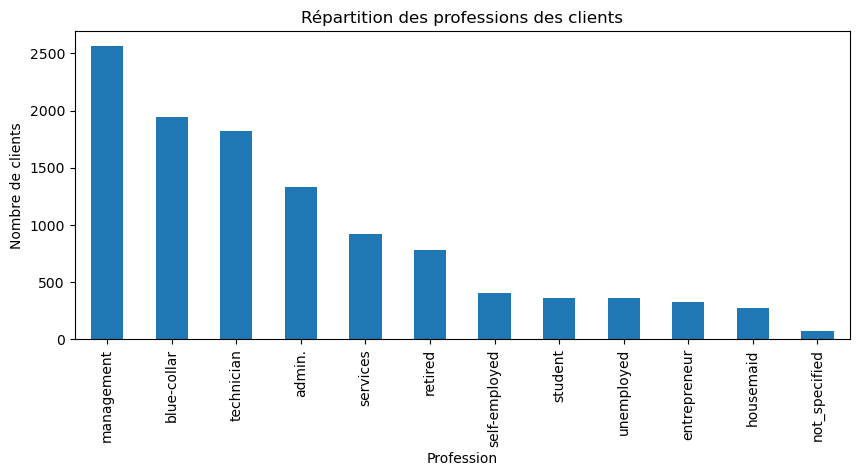

In [112]:
import matplotlib.pyplot as plt

df["job"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Répartition des professions des clients")
plt.xlabel("Profession")
plt.ylabel("Nombre de clients")
plt.show()

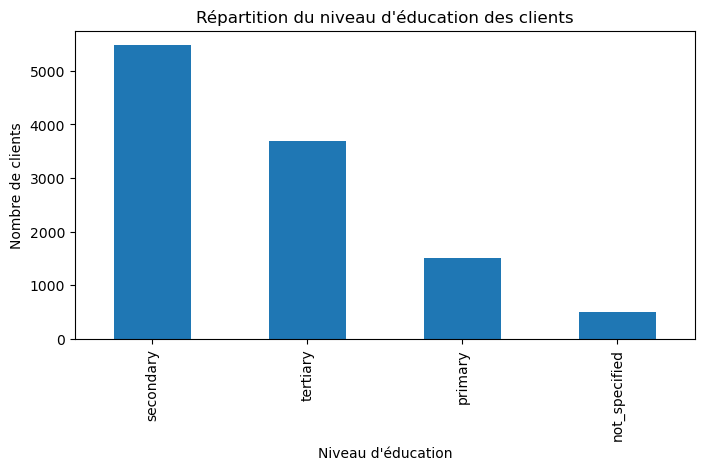

In [113]:
df["education"].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Répartition du niveau d'éducation des clients")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de clients")
plt.show()

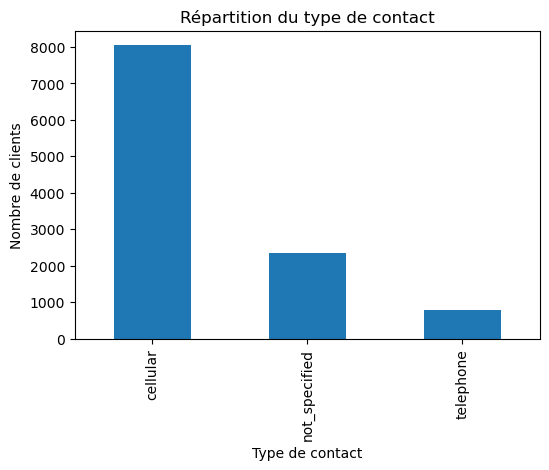

In [114]:
df["contact"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Répartition du type de contact")
plt.xlabel("Type de contact")
plt.ylabel("Nombre de clients")
plt.show()